<a href="https://colab.research.google.com/github/Caue-Aramaki/My-Tensorflow-Playground/blob/main/Testing_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.5.0


In [2]:
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

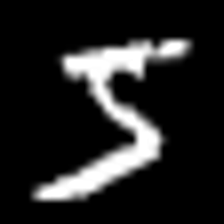

(None, 5)

In [4]:
from PIL import Image
import numpy as np

img = Image.fromarray(np.array(train_data[0]))

img = img.resize(size=(img.size[0]*8, img.size[1]*8), resample=Image.BICUBIC)

display(img), train_labels[0]

In [5]:
# Normalize our data

norm_train_data = train_data / 255
norm_test_data = test_data / 255

In [6]:
tf.random.set_seed(42)

# Model, but no convolutions

raw_model = tf.keras.Sequential([
                             
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # tf.keras.layers.Conv2D(2, 2),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")

])

# Compile the model 
raw_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Learning Scheduler

epoch_amount = 10

def custom_schedule(epoch):
  return 1e-3 * (0.9**(epoch/20))
  # return 1e-3

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: custom_schedule(epoch))

# Fit the model
training_history = raw_model.fit(norm_train_data,
                            train_labels,
                            epochs=epoch_amount,
                            validation_data=(norm_test_data, test_labels),
                            callbacks=[lr_scheduler])


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6971 - accuracy: 0.7718 - val_loss: 0.6814 - val_accuracy: 0.7862
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6436 - accuracy: 0.7994 - val_loss: 0.6280 - val_accuracy: 0.8115
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6130 - accuracy: 0.8124 - val_loss: 0.6028 - val_accuracy: 0.8218
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5925 - accuracy: 0.8202 - val_loss: 0.5932 - val_accuracy: 0.8229
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5756 - accuracy: 0.8271 - val_loss: 0.5821 - val_accuracy: 0.8272
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.8314 - val_loss: 0.5825 - val_accuracy:

In [8]:
tf.argmax(tf.squeeze(raw_model.predict(norm_test_data[0:1]))), test_labels[0]

(<tf.Tensor: shape=(), dtype=int64, numpy=7>, 7)

**Let us try using convolutions on our models.**

For that, we will have the following scheme:

Reshaping our data into the suitable input.
Inputting the data into our model.
Applying convolutions, pooling and activations.

Flattening out data.
Using dense layers to predict your result.

In [9]:
# Create the model
from tensorflow.keras.layers import Dense, Activation, Conv2D, InputLayer, MaxPooling2D, Flatten, Dropout


model = tf.keras.models.Sequential(name = 'convolution_model')

# Input layer. Notice: since convolution in this case requires 4 parameters 
# (one of them is added by keras by default), we need to transform our input shape
# and dataset shapes from 2 dimentions to 3 dimentions (even if this requires adding a 
# fool 1 at the end of our shape vector, as (N, M, 1).
model.add(InputLayer(input_shape=(28, 28, 1)))

# Convolution stack. Here we need to specify the filters (number of kernels or filters to be added), 
# the kernel shape (the shape of our kernels or filters).
model.add(Conv2D(16, (2, 2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# As usual, deep learning models like to receive processed data in a flattened manner.
model.add(Flatten())

# Usual dense layers interpretations
model.add(Dense(4))
model.add(Dense(10))
model.add(Activation("softmax"))

In [21]:
norm_train_data = tf.reshape(norm_train_data, shape=(60000, 28, 28, 1))

norm_test_data = tf.reshape(norm_test_data, shape=(10000, 28, 28, 1))

In [22]:
# Let us compile our model

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)

# Let us not forget to create a learning rate scheduler. For further learning rate analysis, 
# we shall create a function which will be the base of our scheduler.

epoch_amount = 10

def custom_schedule(epoch):
  return 1e-3 * (0.9**(epoch/20))
  # return 1e-3

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: custom_schedule(epoch))


# Fit the model training_history = raw_model.fit(norm_train_data,
training_history = model.fit(norm_train_data,
                            train_labels,
                            epochs=epoch_amount,
                            validation_data=(norm_test_data, test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6287 - accuracy: 0.8063 - val_loss: 0.3556 - val_accuracy: 0.8996
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2902 - accuracy: 0.9162 - val_loss: 0.2526 - val_accuracy: 0.9307
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2231 - accuracy: 0.9334 - val_loss: 0.2080 - val_accuracy: 0.9421
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1936 - accuracy: 0.9422 - val_loss: 0.1962 - val_accuracy: 0.9438
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1763 - accuracy: 0.9465 - val_loss: 0.1777 - val_accuracy: 0.9497
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1648 - accuracy: 0.9503 - val_loss: 0.1734 - val_accuracy: 0.9483
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1559 - accuracy: 0.9533 - val_loss: 0.1666 -

In [ ]:
# 95% with one convolutional layer!!!!